In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product
from joblib import Parallel, delayed
from operator import itemgetter
import sncosmo

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
path = os.path.dirname(os.getcwd())
os.chdir(path)
from Emulator.Classes.AllData import AllData
from Emulator.Classes.LightCurve import utkarshGrid, LightCurve
from Emulator.Classes.GP import GP
from Emulator.Classes.GP2D import GP2D
from Emulator.Classes.GP5D import GP5D
os.chdir(os.getcwd() + "/Emulator")
os.getcwd()

'/Users/utkarsh/PycharmProjects/KilonovaeLightCurves/Emulator'

In [3]:
curr_wv = np.arange(100, 3600, 10)
set_n_comp = 50
set_skip_factor = None

In [4]:
# gp = GP5D("Classes/reference.csv")
# gp.skip_factor = set_skip_factor
# gp.set_wv_range(curr_wv)
# gp.n_comp = set_n_comp
# gp.num_pca_components = (4,4)
# time_shape = None
# gp.setXY()
# # gp.save_pca_components(skip_factor = None)
# gp.save_trained_data()
# gp.ComputeDifferenceFlux()
# gp.plot_difference_histogram(binning = 150)
# plt.title("Error in only PCA Components (PCA Flux - Truth)/TRUTH")
# plt.xlabel("Units Log Flux (Error)")
# plt.ylabel("Count")
# plt.xlim(-1, 1)
# plt.show()

In [5]:
# gp = GP5D("Classes/reference.csv")
# gp.set_wv_range(curr_wv)
# gp.n_comp = set_n_comp
# time_shape = None
# gp.num_pca_components = (10,10)
# # gp.save_training_data(time_trauncation = time_shape) # Which wv do you want to extract.  
# gp.save_pca_components(skip_factor = set_skip_factor)
# gp.setXY()
# fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 10, lengthscale=10, ARD = True)
# decay_kernel = GPy.kern.Linear(4 , ARD=True)
# gp.kernel = fitting_kernel * decay_kernel
# gp.model = GPy.models.GPRegression(gp.X,gp.Y,gp.kernel)
# t0 = time.time()
# print(f"[STATUS] Optimizing...")
# gp.model.optimize_restarts(parallel = True, robust = True, num_restarts = 20)
# print(f"[STATUS] {round(time.time() - t0, 2)}s taken to optimize.")
# # gp.model.optimize(messages = True)
# # display(gp.model.rbf.lengthscale)
# display(gp.model.mul.rbf.lengthscale)
# t1 = time.time()
# gp.model_predict(include_like = False)
# print(f"[STATUS] {round(time.time() - t1, 2)}s taken to predict.")
# t2 = time.time()
# gp.save_trained_data()
# print(f"[STATUS] {round(time.time() - t2, 2)}s taken to save data.")
# # gp.ComputeDifferenceFlux()
# # gp.plot_difference_histogram(binning = 150)
# # plt.xlim(-1,1)
# # plt.show()

In [6]:
# gp.plot_filters(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4)
# gp.get_flux(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, time_desired = 2, wv_desired = 250)
# gp.overplot_time(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, wv_desired = 250)
# gp.overplot_wavelength(mejdyn = 0.001, mejwind =  0.01, phi = 45, iobs = 4, time_desired = 2)
# plt.show()

In [7]:
# gp.plot_emulator_errors()

## Single Cross Validation

[STATUS] Setting X, Y components for 5D Model.
[STATUS] Optimizing...
Optimization restart 1/7, f = 1469978.8402152925
Optimization restart 2/7, f = 1469978.8402152923
Optimization restart 3/7, f = 1469978.8402152923
Optimization restart 4/7, f = 1469978.8402152925
Optimization restart 5/7, f = 1469978.8402152925
Optimization restart 6/7, f = 1469978.8402152923
Optimization restart 7/7, f = 1469978.840215292
[STATUS] 99.8s taken to optimize.


index,GP_regression.mul.rbf.lengthscale,constraints,priors
[0],0.10000000,+ve,
[1],0.10000000,+ve,
[2],0.10000000,+ve,
[3],0.10000000,+ve,


[STATUS] Predicting X and Y with trained emulator.
[STATUS] 0.02s taken to predict single item.
[STATUS] Predicting X and Y with trained emulator.
[STATUS] 1.94s taken to predict every item.
[STATUS] 42.52s taken to save data.
Inside 3x: 35000, Total: 35000


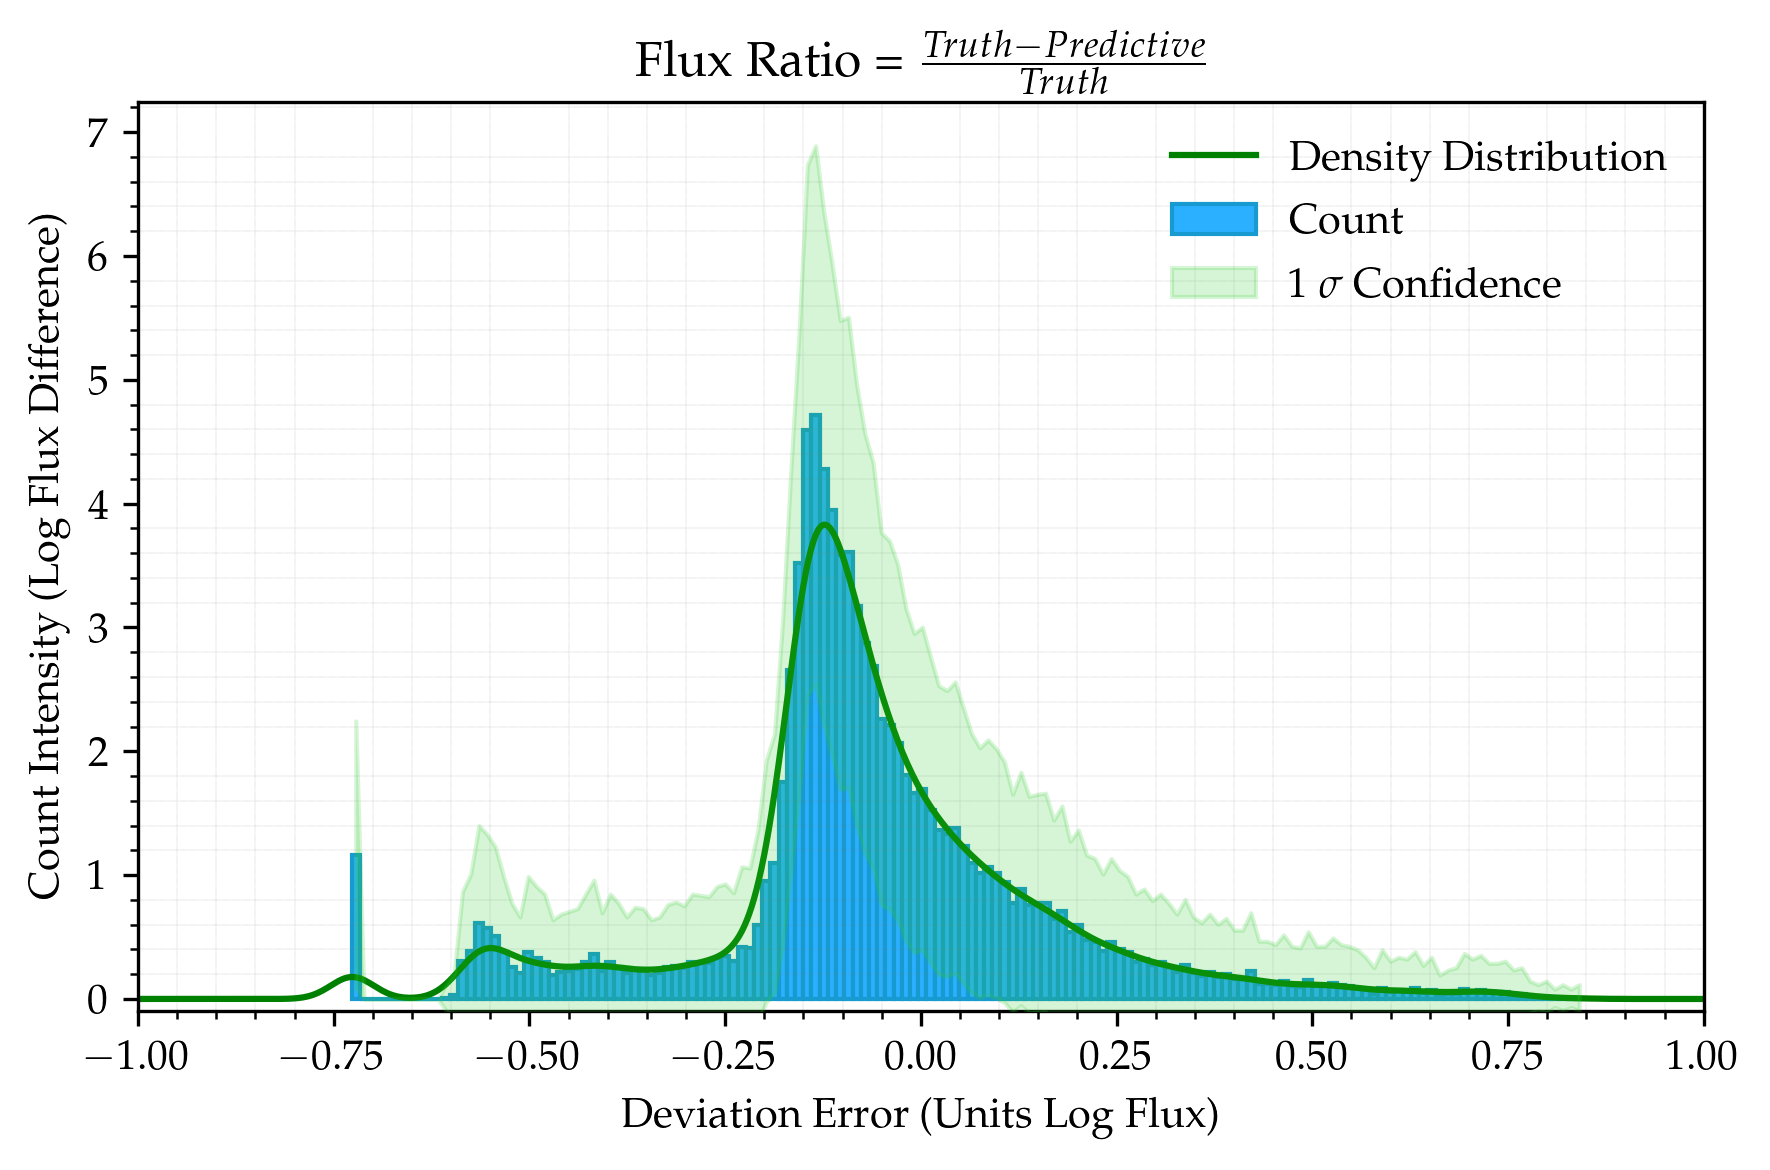

In [8]:
mejdyn = 0.001
mejwind =  0.01
phi = 45
iobs = 4
gp = GP5D("Classes/reference.csv")
gp.cross_validation = (mejdyn, mejwind, phi, iobs)
gp.set_wv_range(curr_wv)
gp.n_comp = set_n_comp
time_shape = None
gp.num_pca_components = (10,10)
# gp.save_training_data(time_trauncation = time_shape) # Which wv do you want to extract.  
gp.save_pca_components(skip_factor = set_skip_factor)
gp.setXY_cross_validation(mejdyn, mejwind, phi, iobs)
fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 1, lengthscale=1, ARD = True)
decay_kernel = GPy.kern.Linear(input_dim=4)
gp.kernel = fitting_kernel * decay_kernel
gp.model = GPy.models.GPRegression(gp.X,gp.Y,gp.kernel)
t0 = time.time()
print(f"[STATUS] Optimizing...")
gp.model.optimize_restarts(parallel = True, robust = True, num_restarts = 7)
print(f"[STATUS] {round(time.time() - t0, 2)}s taken to optimize.")
# gp.model.optimize(messages = True)
# display(gp.model.rbf.lengthscale)
display(gp.model.mul.rbf.lengthscale)
t1 = time.time()
gp.model_predict_cross_validation(include_like = True) # Save cross validatoin
print(f"[STATUS] {round(time.time() - t1, 2)}s taken to predict single item.")
gp.model_predict(include_like = True)
print(f"[STATUS] {round(time.time() - t1, 2)}s taken to predict every item.")
t2 = time.time()
gp.save_trained_data()
print(f"[STATUS] {round(time.time() - t2, 2)}s taken to save data.")
gp.ComputeDifferenceFlux()
gp.plot_difference_histogram(binning = 150)
plt.xlim(-1,1)
plt.show()

=== Flux Estimation === 
mejdyn: 0.001
mejwind: 0.01        
phi: 45
viewing_angle: 4
wavelength: 1150nm        
time: 2.0 days

LOG FLUX: -4.89711


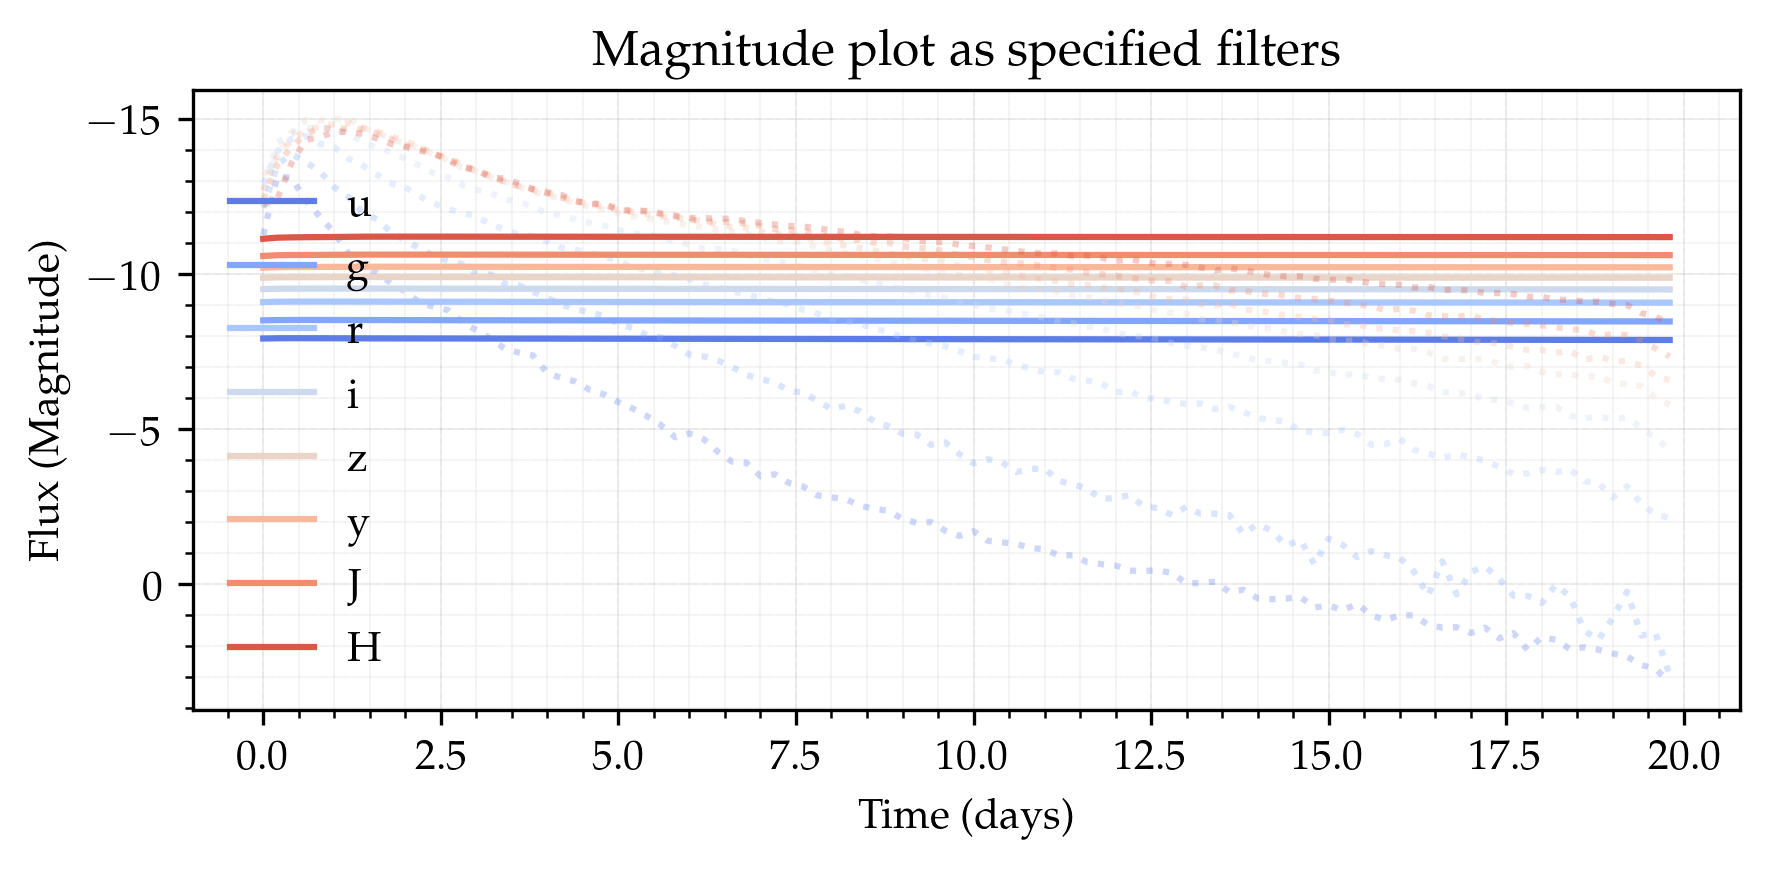

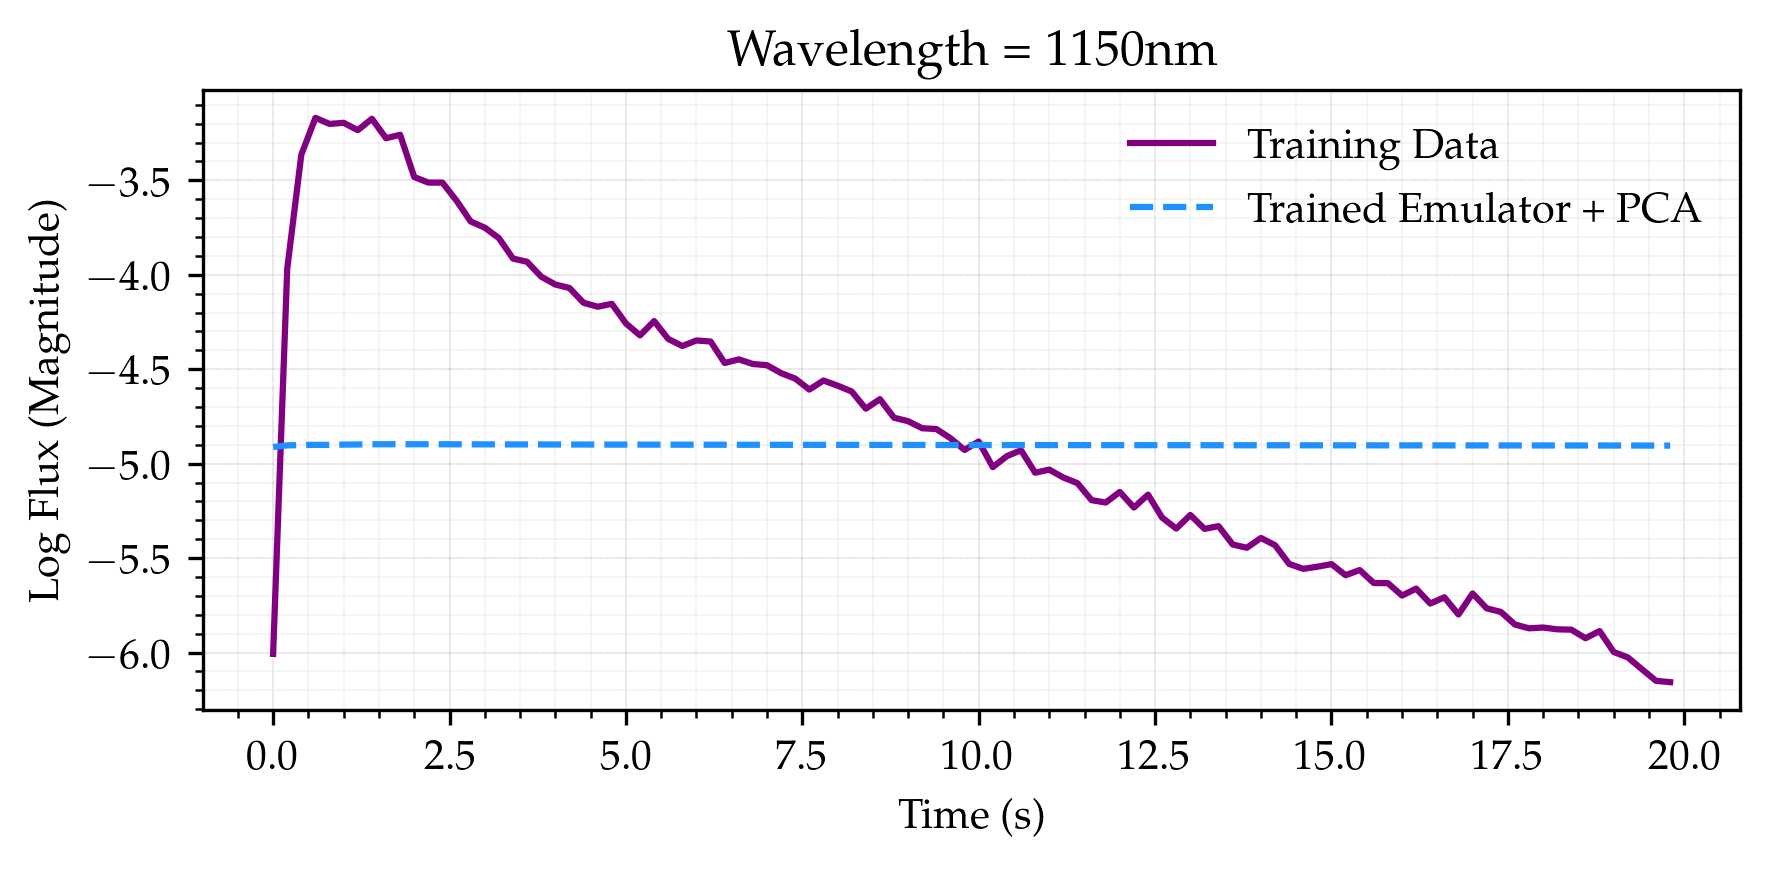

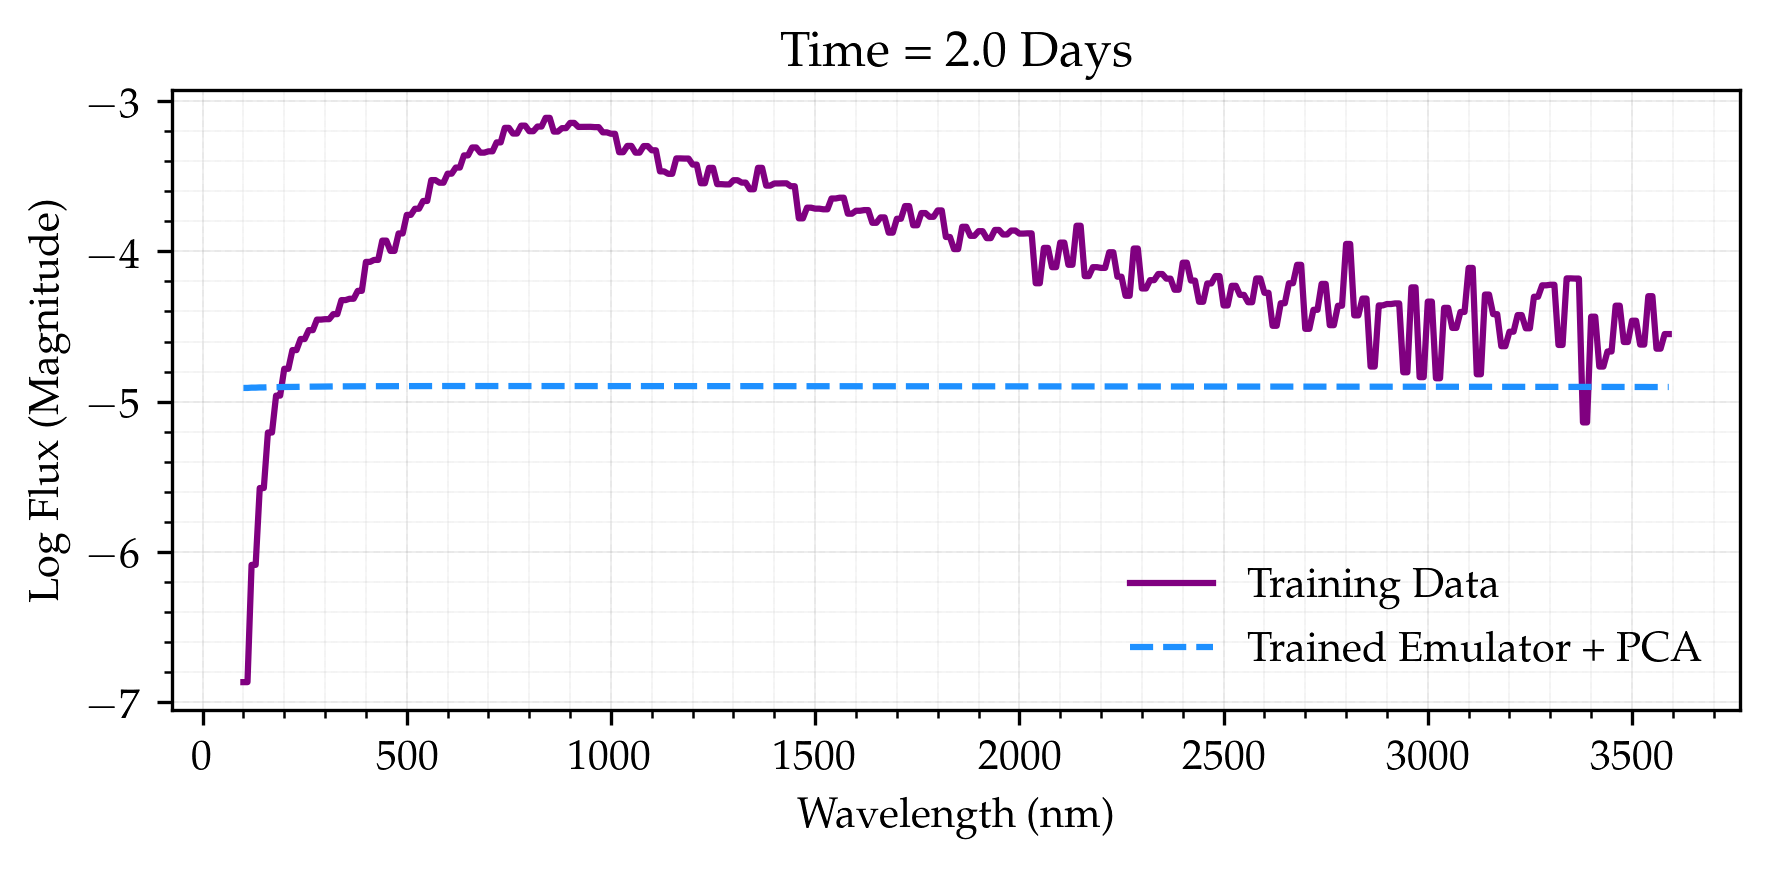

In [9]:
gp.plot_filters(mejdyn = mejdyn, mejwind =  mejwind, phi = phi, iobs = iobs)
gp.get_flux(mejdyn = mejdyn, mejwind =  mejwind, phi = phi, iobs = iobs, time_desired = 2, wv_desired = 1150)
gp.overplot_time(mejdyn = mejdyn, mejwind =  mejwind, phi = phi, iobs = iobs, wv_desired = 1150)
gp.overplot_wavelength(mejdyn = mejdyn, mejwind =  mejwind, phi = phi, iobs = iobs, time_desired = 2)
plt.show()

In [10]:
# gp = GP5D("Classes/reference.csv")
# gp.set_wv_range(curr_wv)
# gp.n_comp = set_n_comp
# # gp.num_pca_components = (4,4)
# # gp.save_training_data(time_trauncation = None) # Which wv do you want to extract.  
# gp.save_pca_components(skip_factor = set_skip_factor)
# gp.setXY()
# fitting_kernel = GPy.kern.RBF(input_dim=4, variance = 10, lengthscale=10, ARD = True)
# decay_kernel = GPy.kern.Linear(4,ARD=True)
# gp.kernel = fitting_kernel * decay_kernel
# gp.LOOCV_PCA()
# gp.plot_loocv_histogram() # THIS IS FOR PCA COMPONENTS, NOT TRAINING DATA

In [11]:
# gp.save_trained_data()
# gp.ComputeDifferenceFlux()
# gp.plot_difference_histogram(binning = 100)
# plt.xlim(-1, 1)